# How to make predictions with California Fire Data
<p>Prepared by Brenda Martinez Martinez for Data Mining, Catawba College, Spring 2025
<p> Purpose: Use linear regression to predict the size of a fire by one of the other numerical features.

In [49]:
import pandas as pd #file processing
import seaborn as sns #visualizations
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score #metrics
import numpy as np #math

## Get the data (csv from url referencing github raw data view)

In [50]:
#California_Fire_IncidentsPath = 'https://raw.githubusercontent.com/Brenda-Martinez-Martinez/CIS-3902-Data-Mining/refs/heads/main/California_Fire_Incidents.csv'
df = pd.read_csv("California_Fire_Incidents.csv")

#Examine information on the fires dataset (features, first 5 records)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AcresBurned           1633 non-null   float64
 1   Active                1636 non-null   bool   
 2   AdminUnit             1636 non-null   object 
 3   AirTankers            28 non-null     float64
 4   ArchiveYear           1636 non-null   int64  
 5   CalFireIncident       1636 non-null   bool   
 6   CanonicalUrl          1636 non-null   object 
 7   ConditionStatement    284 non-null    object 
 8   ControlStatement      105 non-null    object 
 9   Counties              1636 non-null   object 
 10  CountyIds             1636 non-null   object 
 11  CrewsInvolved         171 non-null    float64
 12  Dozers                123 non-null    float64
 13  Engines               191 non-null    float64
 14  Extinguished          1577 non-null   object 
 15  Fatalities           

In [52]:
df.head()

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,NaN,2013,True,/incidents/2013/8/17/rim-fire/,NaN,NaN,Tuolumne,...,"Rim Fire, Stanislaus National Forest, Yosemite...",2013-08-17T15:25:00Z,Finalized,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,NaN
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,NaN,2013,True,/incidents/2013/5/30/powerhouse-fire/,NaN,NaN,Los Angeles,...,"Powerhouse Fire, May 2013, June 2013, Angeles ...",2013-05-30T15:28:00Z,Finalized,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,NaN
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/7/15/mountain-fire/,NaN,NaN,Riverside,...,"Mountain Fire, July 2013, Highway 243, Highway...",2013-07-15T13:43:00Z,Finalized,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,NaN
3,27440.0,False,Tahoe National Forest,NaN,2013,False,/incidents/2013/8/10/american-fire/,NaN,NaN,Placer,...,"American Fire, August 2013, Deadwood Ridge, Fo...",2013-08-10T16:30:00Z,Finalized,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z,NaN
4,24251.0,False,Ventura County Fire/CAL FIRE,NaN,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,NaN,Ventura,...,"Springs Fire, May 2013, Highway 101, Camarillo...",2013-05-02T07:01:00Z,Finalized,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z,11.0


### This creates a new filtered dataframe named housing

In [53]:
#housing = housing.query('sqft_living < 8000 and price < 1000000 and price > 0')

### This code creates a new boolean feature 'has_basement'

In [54]:
#housing['has_basement'] = housing['sqft_basement'].apply(
   # lambda x: True if x > 0 else False)

### Drop columns that are not necessary for the problem

In [55]:
# Specify the columns you want to keep (including 'Acresburned')
columns_to_keep = ['AcresBurned', 'PersonnelInvolved', 'MajorIncident', 'StructuresDestroyed','Injuries',
                   'WaterTenders']

# Create a new DataFrame with only the selected columns
df1 = df[columns_to_keep]

## The Fires dataset

In [56]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AcresBurned          1633 non-null   float64
 1   PersonnelInvolved    204 non-null    float64
 2   MajorIncident        1636 non-null   bool   
 3   StructuresDestroyed  175 non-null    float64
 4   Injuries             120 non-null    float64
 5   WaterTenders         146 non-null    float64
dtypes: bool(1), float64(5)
memory usage: 65.6 KB


In [57]:
df1.head(10)

,AcresBurned,PersonnelInvolved,MajorIncident,StructuresDestroyed,Injuries,WaterTenders
0,257314.0,NaN,False,NaN,NaN,NaN
1,30274.0,NaN,False,NaN,NaN,NaN
2,27531.0,NaN,False,NaN,NaN,NaN
3,27440.0,NaN,False,NaN,NaN,NaN
4,24251.0,2167.0,True,10.0,10.0,11.0
5,22992.0,NaN,False,NaN,NaN,NaN
6,20292.0,2106.0,True,40.0,26.0,20.0
7,14754.0,NaN,False,NaN,NaN,NaN
8,12503.0,NaN,False,NaN,NaN,NaN
9,11429.0,898.0,True,NaN,5.0,8.0


## How to identify correlations/trends with a scatterplot

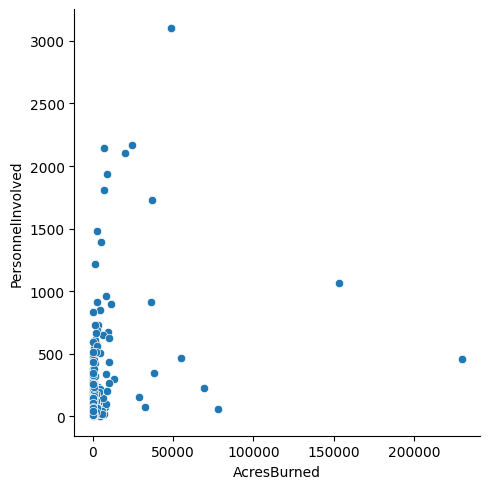

In [58]:
sns.relplot(data=df1, x='AcresBurned', y='PersonnelInvolved')

In [59]:
df1_cleaned = df1.dropna(subset=['AcresBurned', 'PersonnelInvolved'])

In [60]:
df1_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 4 to 1626
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AcresBurned          204 non-null    float64
 1   PersonnelInvolved    204 non-null    float64
 2   MajorIncident        204 non-null    bool   
 3   StructuresDestroyed  91 non-null     float64
 4   Injuries             85 non-null     float64
 5   WaterTenders         133 non-null    float64
dtypes: bool(1), float64(5)
memory usage: 9.8 KB


#For this example, we are replacing all nulls with 0. This, of course, changes the data.

In [61]:
df1_cleaned = df1_cleaned.fillna(0)

In [62]:
df1_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 4 to 1626
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AcresBurned          204 non-null    float64
 1   PersonnelInvolved    204 non-null    float64
 2   MajorIncident        204 non-null    bool   
 3   StructuresDestroyed  204 non-null    float64
 4   Injuries             204 non-null    float64
 5   WaterTenders         204 non-null    float64
dtypes: bool(1), float64(5)
memory usage: 9.8 KB


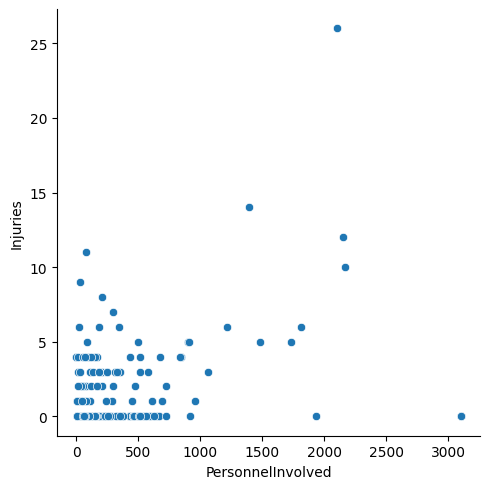

In [63]:
sns.relplot(data=df1_cleaned, x='PersonnelInvolved', y='Injuries') #relationship plot

## How to identify correlations with a grid of scatterplots

In [64]:
#sns.pairplot(data=housing,
             #y_vars=['price','sqft_living','sqft_above'],
             #x_vars=['price','sqft_living','sqft_above'],
             #diag_kind='kde')

## How to identify correlations with r-values

In [65]:
df1_cleaned.corr().head()

,AcresBurned,PersonnelInvolved,MajorIncident,StructuresDestroyed,Injuries,WaterTenders
AcresBurned,1.000000,0.258150,0.023794,0.483179,0.043289,0.369115
PersonnelInvolved,0.258150,1.000000,0.086016,0.105604,0.367862,0.819576
MajorIncident,0.023794,0.086016,1.000000,0.023955,0.137926,0.101068
StructuresDestroyed,0.483179,0.105604,0.023955,1.000000,0.032953,0.013616
Injuries,0.043289,0.367862,0.137926,0.032953,1.000000,0.128588


In [66]:
df1_cleaned.corr()[['AcresBurned']].sort_values(by='AcresBurned', ascending=False)
 #shows corr of each feature to price (note: price = 1)

,AcresBurned
AcresBurned,1.000000
StructuresDestroyed,0.483179
WaterTenders,0.369115
PersonnelInvolved,0.258150
Injuries,0.043289
MajorIncident,0.023794


## How to identify correlations with a heatmap

<Axes: >

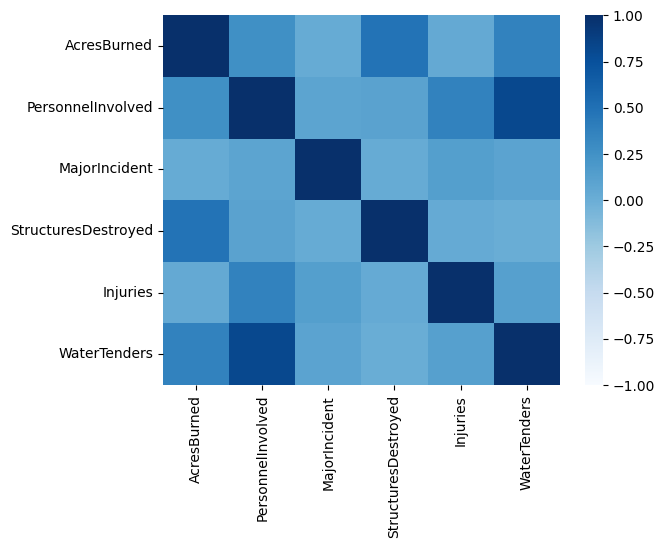

In [67]:
sns.heatmap(data=df1_cleaned.corr(), cmap='Blues', vmin=-1.0, vmax=1.0)

<Axes: >

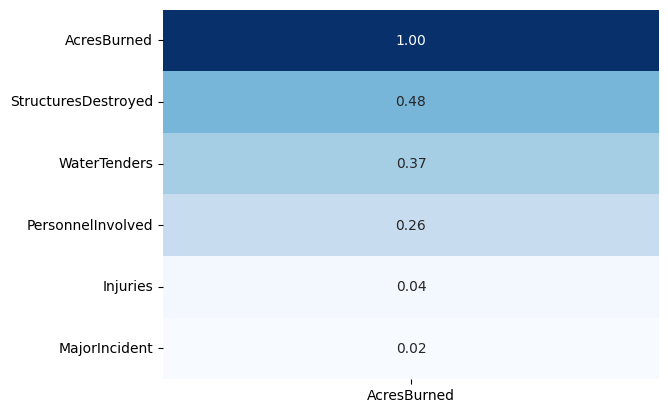

In [68]:
sns.heatmap(data=df1_cleaned.corr()[['AcresBurned']].sort_values(by='AcresBurned', ascending=False),
            annot=True, cmap='Blues', cbar=False, fmt=f'.2f')

## How to create, validate, and use a linear regression model with scikit-learn
<p>Link to documentation for scikit-learn: <a href="https://scikit-learn.org/stable/">Scikit-Learn documentation</a></p>


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Explanation of x_train and test, y_train and test
<p>
x_train and x_test are the features (inputs).<br>
y_train and y_test are the target variables (outputs).<br>
The model separates the data 77% and 33% (train and test).<br>
The model uses x_train and y_train to learn, then is tested on x_test and compared with y_test to see how well it generalizes.</p>
<p>Random State Parameter: <br>
Without random_state (or random_state=None): Every time you run the code, the data might be split in a different way because the random shuffling changes each time.</p><p>

With random_state set to a specific number: The shuffling and splitting process will always be the same whenever you run the code, as long as the data doesn't change. This is useful for consistency, especially if you need to compare results across different runs or share your code with others and want them to get the same results.</p>

In [70]:
# split the data
x_train, x_test, y_train, y_test = train_test_split(
    df1_cleaned[['PersonnelInvolved']], df1_cleaned[['AcresBurned']],
    test_size=0.33, random_state=42)

# create the model from the training dataset
linearModel = LinearRegression()
linearModel.fit(x_train, y_train)

# Get predictions from the model using the test data
y_pred = linearModel.predict(x_test)

# validate the model with the test dataset, this is the R squared score
linearModel.score(x_test, y_test)

0.18851865673288237

### Summary of the Scores
<p>
R² (R-squared): How well the model fits the data.<br>
MAE (Mean Absolute Error): The average magnitude of errors in the predictions (in original units).<br>
MSE (Mean Squared Error): The average of the squared errors (penalizes large errors).<br>
RMSE (Root Mean Squared Error): The square root of MSE (in original units).<br>
MAPE (Mean Absolute Percentage Error): Percentage error (useful when comparing across datasets with different scales).<br>
</p>

In [71]:
# R-squared score (already calculated with .score())
r2 = linearModel.score(x_test, y_test)
print(f"R-squared: {r2:.3f}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

R-squared: 0.189
Mean Absolute Error (MAE): 8801.91
Mean Squared Error (MSE): 346812952.94
Root Mean Squared Error (RMSE): 18622.91
Mean Absolute Percentage Error (MAPE): 4236.76%


### Print the equation for the regression line

In [72]:
# Get the slope (coefficient) and intercept
slope = linearModel.coef_[0][0]  # Get the first element as it's a single feature
intercept = linearModel.intercept_[0]

# Display the equation of the regression line
print(f"The equation of the regression line is: y = {slope:.2f}x + {intercept:.2f}")

The equation of the regression line is: y = 11.42x + 4294.95


### Explanation of Regression Line
<p>The slope of 157.05 means each additional square foot increases the price by 157.05. The intercept of 160591.26 means that if the house has 0 squar feet (a theoritial baseline), the predicted price will be 160,591.26.</p>

In [73]:
# use the model to make predictions
y_predicted = linearModel.predict(x_test)
y_predicted

array([[10029.52769235],
       [12588.3845399 ],
       [ 7048.00252623],
       [ 7379.28310025],
       [20196.41427412],
       [ 9172.76758714],
       [12599.80800797],
       [ 6008.46693192],
       [ 4923.23746532],
       [ 4694.76810393],
       [12199.98662554],
       [ 6488.25259083],
       [ 5208.82416706],
       [16460.94021543],
       [ 5334.48231582],
       [ 8041.84424827],
       [ 4340.64059378],
       [ 5528.681273  ],
       [ 4900.39052918],
       [ 5265.9415074 ],
       [ 4751.88544428],
       [ 4980.35480567],
       [ 5665.76288983],
       [ 7630.59939777],
       [ 5403.02312424],
       [ 7516.36471708],
       [11446.03773296],
       [ 4809.00278463],
       [ 4386.33446606],
       [ 6042.73733612],
       [ 5437.29352845],
       [ 4500.56914675],
       [11743.04790276],
       [ 6750.99235643],
       [ 4786.15584849],
       [14735.99653694],
       [ 9983.83382007],
       [ 4409.1814022 ],
       [ 4923.23746532],
       [ 7150.81373886],


## How to plot the predicted data

In [74]:
# put predicted values in a frame
predicted = pd.DataFrame(y_predicted, columns=['Predicted_AcresBurned'])

# combine the test data and the predicted data
combined = predicted.join([x_test.reset_index(drop=True),
                           y_test.reset_index(drop=True)])

# show combined
combined.head()

,Predicted_AcresBurned,PersonnelInvolved,AcresBurned
0,10029.527692,502.0,712.0
1,12588.384540,726.0,3166.0
2,7048.002526,241.0,441.0
3,7379.283100,270.0,673.0
4,20196.414274,1392.0,4883.0


In [75]:
#melt the data in order to improve some of the visualizations
# melt price and price_predicted columns into a single column
melted = pd.melt(combined, id_vars=['PersonnelInvolved'],
                 value_vars=['AcresBurned','Predicted_AcresBurned'],
                 var_name='AcresBurned_type', value_name='AcresBurned_value')
melted.head()

,PersonnelInvolved,AcresBurned_type,AcresBurned_value
0,502.0,AcresBurned,712.0
1,726.0,AcresBurned,3166.0
2,241.0,AcresBurned,441.0
3,270.0,AcresBurned,673.0
4,1392.0,AcresBurned,4883.0


In [76]:
# Sort by 'sqft_living' in ascending order and display the top rows in order to see the results of melting the dataframe better
melted_sorted = melted.sort_values(by='PersonnelInvolved', ascending=True)  # Change to False for descending
melted_sorted.head()

,PersonnelInvolved,AcresBurned_type,AcresBurned_value
43,0.0,AcresBurned,4300.000000
111,0.0,Predicted_AcresBurned,4294.946722
16,4.0,AcresBurned,376.000000
84,4.0,Predicted_AcresBurned,4340.640594
28,8.0,AcresBurned,680.000000


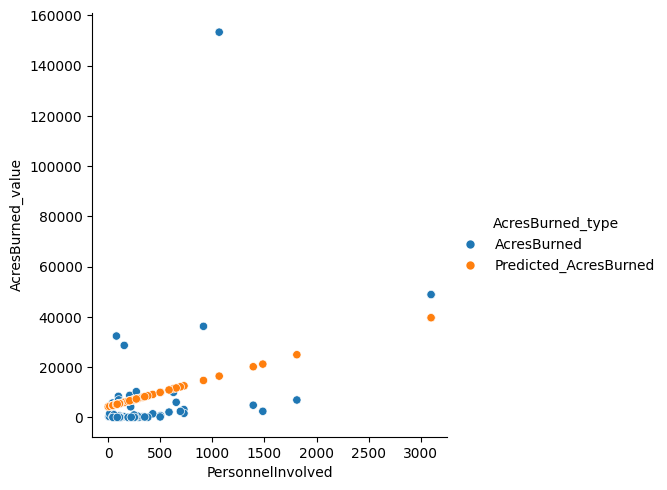

In [77]:
#relationship plot
sns.relplot(data=melted, x='PersonnelInvolved', y='AcresBurned_value',
            hue='AcresBurned_type')

## How to plot the residuals

In [78]:
combined['residual'] = combined.AcresBurned - combined.Predicted_AcresBurned
combined.head()

,Predicted_AcresBurned,PersonnelInvolved,AcresBurned,residual
0,10029.527692,502.0,712.0,-9317.527692
1,12588.384540,726.0,3166.0,-9422.384540
2,7048.002526,241.0,441.0,-6607.002526
3,7379.283100,270.0,673.0,-6706.283100
4,20196.414274,1392.0,4883.0,-15313.414274


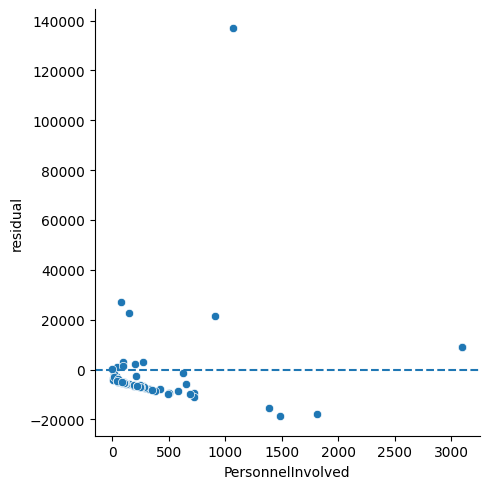

In [79]:
g = sns.relplot(data=combined, x='PersonnelInvolved', y='residual')

# draw a horizontal line where the Y axis is 0
for ax in g.axes.flat:
    ax.axhline(0, ls='--')

## How to plot a linear regression

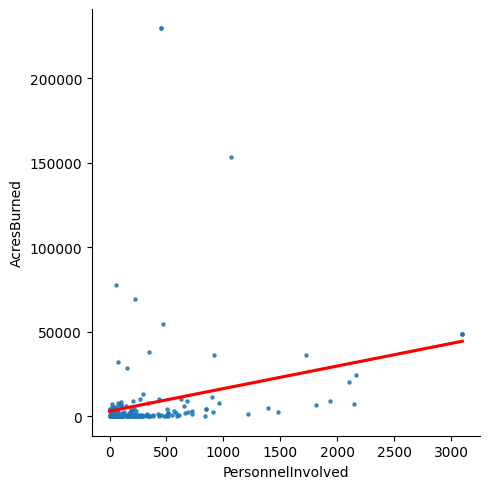

In [80]:
sns.lmplot(data=df1_cleaned, x='PersonnelInvolved', y='AcresBurned', ci=None,
           scatter_kws={'s':5}, line_kws={'color':'red'})

## How to plot a logistic regression

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


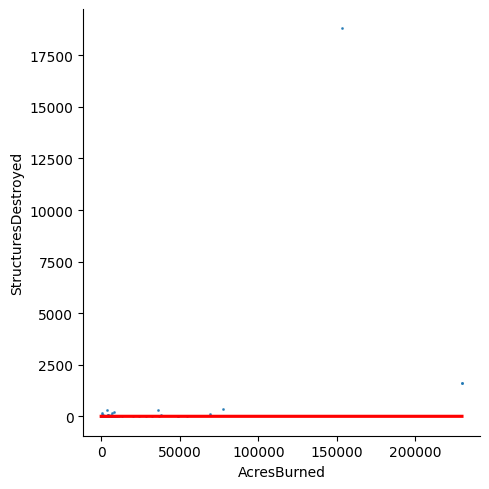

In [81]:
sns.lmplot(data=df1_cleaned, x='AcresBurned', y='StructuresDestroyed', ci=None,
           scatter_kws={'s':1}, line_kws={'color':'red'},
           logistic=True)

## How to plot residuals with Seaborn

<Axes: xlabel='PersonnelInvolved', ylabel='AcresBurned'>

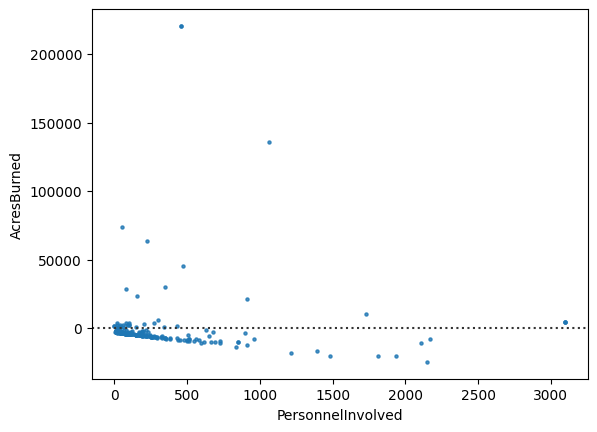

In [82]:
sns.residplot(data=df1_cleaned, x='PersonnelInvolved', y='AcresBurned',
              scatter_kws={'s':5})